In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import src.data_utils as data_utils
import src.tree_build as dt_tree
import src.heurestics as dt_heur
import src.tree_utils as tree_utils
import src.dt_testing_utils as dt_testing
import src.tree_pruning as tree_pruning

from pprint import pprint
import numpy as np
import pandas as pd
from sklearn.utils import resample

## Utils

In [3]:
def print_tree_informations(tree, training_data, testing_data):
    accuracy_testing = tree_utils.tree_accuracy(testing_data, tree)
    accuracy_training = tree_utils.tree_accuracy(training_data, tree)
    levels = tree_utils.number_of_levels(tree)
    leafs = tree_utils.number_of_leafs(tree)
    print("Accuracy for: testing {0:.2f}% | training {1:.2f}% | levels {2} | leafs {3}".format(accuracy_testing, accuracy_training,levels, leafs))

In [4]:
#heuristics
def train_and_prune_tree(heurestic, training_data, testing_data, validation_data):
    print("Before Pruning - heuristic = {0}".format(heurestic.__name__))
    trained_tree = dt_tree.build_tree_generic(heurestic, training_data)
    print_tree_informations(trained_tree, training_data, testing_data)
#     pprint(trained_tree)
    print("After Pruning:")
    pruned_trained_tree = tree_pruning.reduced_error_pruning(trained_tree, validation_data)
    print_tree_informations(pruned_trained_tree, training_data, testing_data)
    print('\n')
#     pprint(pruned_trained_tree)

In [5]:
default_heuristics = [dt_heur.gini_impurity_weighted, dt_heur.info_gain, dt_heur.information_gain_ratio,
                      dt_heur.distance_measure, dt_heur.j_measure, dt_heur.weight_of_evidence,
                      dt_heur.gini_pri, dt_heur.relief, dt_heur.relevance, dt_heur.mdl_simple]

def train_tree_for_different_heuristics(training_data, testing_data, validation_data, heuristics = default_heuristics):
    for heuristic in heuristics:
        train_and_prune_tree(heuristic, training_data, testing_data, validation_data)

# Car dataset

## Dataset preparation

In [6]:
car_dataset_path = 'data/car.data'
car_dataset_labels = ['buying','maint','doors','persons','lug_boot','safety','CLASS']
car_dataset = data_utils.preapare_dataset(car_dataset_path, car_dataset_labels)
car_dataset.head()

,buying,maint,doors,persons,lug_boot,safety,CLASS
0,high,med,3,4,big,high,acc
1,med,high,5more,2,small,med,unacc
2,vhigh,high,3,2,big,low,unacc
3,med,high,3,more,small,med,unacc
4,high,med,2,4,big,high,acc


### Car 70%

unacc    562
acc      180
good      32
vgood     31
Name: CLASS, dtype: int64


<AxesSubplot:title={'center':'class'}>

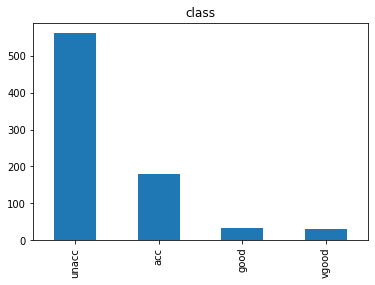

In [7]:
car_set_for_training70, car_testing70 = data_utils.data_split(car_dataset, 70)
car_training70, car_validation70 = data_utils.split_training_data_for_pruning(car_set_for_training70)
print(car_training70['CLASS'].value_counts())
car_training70['CLASS'].value_counts().plot(kind='bar', title='class')

In [8]:
# car_training

180


<AxesSubplot:title={'center':'class'}>

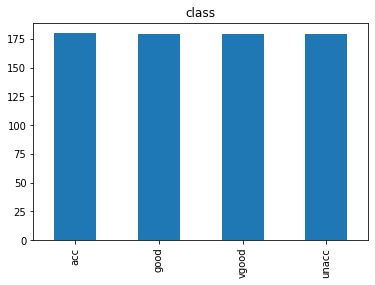

In [9]:
#Target for all 174
resampling_car70 = car_training70.copy()
unacc_part70 = resampling_car70[resampling_car70['CLASS'] == 'unacc']
acc_part70 = resampling_car70[resampling_car70['CLASS'] == 'acc'] 
print(len(acc_part70))
vgood_part70 = resampling_car70[resampling_car70['CLASS'] == 'vgood'] 
good_part70 = resampling_car70[resampling_car70['CLASS'] == 'good'] 


unacc_downsample70 = resample(unacc_part70, 
                                 replace=False,     
                                 n_samples=179)

vgood_part_upsampled70 = resample(vgood_part70, 
                                 replace=True,     
                                 n_samples=179)
good_part_upsampled70 = resample(good_part70, 
                                 replace=True,     
                                 n_samples=179)

# Combine majority class with upsamplet minority class
balanced_car_training70 = pd.concat([unacc_downsample70, acc_part70, vgood_part_upsampled70, good_part_upsampled70])
balanced_car_training70 = balanced_car_training70.reset_index(level=None, drop=True, inplace=False, col_level=0, col_fill='')
balanced_car_training70 = balanced_car_training70.sample(frac=1).reset_index(drop=True)

car_training70 = balanced_car_training70.copy()
car_training70['CLASS'].value_counts().plot(kind='bar', title='class')

In [10]:
car_training70.head()

,buying,maint,doors,persons,lug_boot,safety,CLASS
0,med,med,3,2,med,med,unacc
1,high,med,3,2,med,low,unacc
2,low,high,5more,more,small,high,acc
3,high,vhigh,5more,more,small,high,unacc
4,low,high,2,4,big,med,acc


### Dataset 80%

unacc    644
acc      208
good      36
vgood     33
Name: CLASS, dtype: int64


<AxesSubplot:title={'center':'class'}>

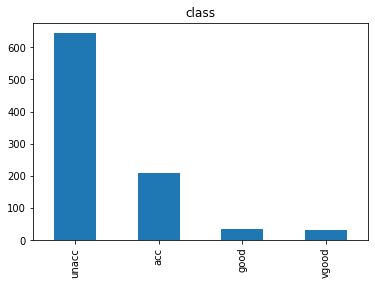

In [11]:
car_set_for_training80, car_testing80 = data_utils.data_split(car_dataset, 80)
car_training80, car_validation80 = data_utils.split_training_data_for_pruning(car_set_for_training80)
print(car_training80['CLASS'].value_counts())
car_training80['CLASS'].value_counts().plot(kind='bar', title='class')

In [12]:
# car_training80

<AxesSubplot:title={'center':'class'}>

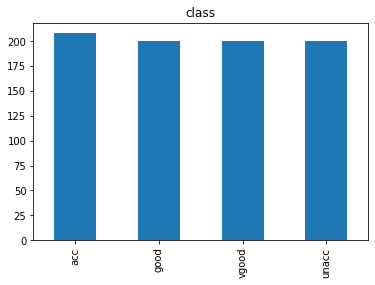

In [13]:
#Target for all 318
resampling_car80 = car_training80.copy()
unacc_part80 = resampling_car80[resampling_car80['CLASS'] == 'unacc']
acc_part80 = resampling_car80[resampling_car80['CLASS'] == 'acc'] 
vgood_part80 = resampling_car80[resampling_car80['CLASS'] == 'vgood'] 
good_part80 = resampling_car80[resampling_car80['CLASS'] == 'good'] 


unacc_downsample80 = resample(unacc_part80, 
                                 replace=False,     
                                 n_samples=200)

vgood_part_upsampled80 = resample(vgood_part80, 
                                 replace=True,     
                                 n_samples=200)
good_part_upsampled80 = resample(good_part80, 
                                 replace=True,     
                                 n_samples=200)

# Combine majority class with upsamplet minority class
balanced_car_training80 = pd.concat([unacc_downsample80, acc_part80, vgood_part_upsampled80, good_part_upsampled80])
balanced_car_training80 = balanced_car_training80.reset_index(level=None, drop=True, inplace=False, col_level=0, col_fill='')
balanced_car_training80 = balanced_car_training80.sample(frac=1).reset_index(drop=True)

car_training80 = balanced_car_training80.copy()
car_training80['CLASS'].value_counts().plot(kind='bar', title='class')

In [14]:
# car_training80.head()

### Dataset 90%

unacc    716
acc      241
good      40
vgood     39
Name: CLASS, dtype: int64


<AxesSubplot:title={'center':'class'}>

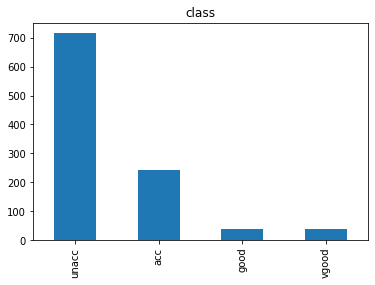

In [15]:
car_set_for_training90, car_testing90 = data_utils.data_split(car_dataset, 90)
car_training90, car_validation90 = data_utils.split_training_data_for_pruning(car_set_for_training90)
print(car_training90['CLASS'].value_counts())
car_training90['CLASS'].value_counts().plot(kind='bar', title='class')

<AxesSubplot:title={'center':'class'}>

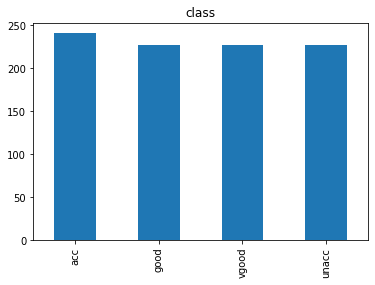

In [16]:
#Target for all 352?
resampling_car90 = car_training90.copy()
unacc_part90 = resampling_car90[resampling_car90['CLASS'] == 'unacc']
acc_part90 = resampling_car90[resampling_car90['CLASS'] == 'acc']
vgood_part90 = resampling_car90[resampling_car90['CLASS'] == 'vgood'] 
good_part90 = resampling_car90[resampling_car90['CLASS'] == 'good'] 


unacc_downsample90 = resample(unacc_part90, 
                                 replace=False,     
                                 n_samples=227)

vgood_part_upsampled90 = resample(vgood_part90, 
                                 replace=True,     
                                 n_samples=227)
good_part_upsampled90 = resample(good_part90, 
                                 replace=True,     
                                 n_samples=227)

# Combine majority class with upsamplet minority class
balanced_car_training90 = pd.concat([unacc_downsample90, acc_part90, vgood_part_upsampled90, good_part_upsampled90])
balanced_car_training90 = balanced_car_training90.reset_index(level=None, drop=True, inplace=False, col_level=0, col_fill='')
balanced_car_training90 = balanced_car_training90.sample(frac=1).reset_index(drop=True)

car_training90 = balanced_car_training90.copy()
car_training90['CLASS'].value_counts().plot(kind='bar', title='class')

In [17]:
# car_training90

## Model Training

In [18]:
train_tree_for_different_heuristics(car_training70, car_testing70, car_validation70)

Before Pruning - heuristic = gini_impurity_weighted
Accuracy for: testing 85.16% | training 96.37% | levels 10 | leafs 117
After Pruning:
Accuracy for: testing 85.36% | training 94.00% | levels 10 | leafs 105


Before Pruning - heuristic = info_gain
Accuracy for: testing 85.16% | training 96.51% | levels 10 | leafs 117
After Pruning:
Accuracy for: testing 86.32% | training 93.44% | levels 10 | leafs 104


Before Pruning - heuristic = information_gain_ratio
Accuracy for: testing 84.59% | training 96.79% | levels 10 | leafs 118
After Pruning:
Accuracy for: testing 85.93% | training 94.56% | levels 10 | leafs 105


Before Pruning - heuristic = distance_measure
Accuracy for: testing 54.91% | training 78.10% | levels 10 | leafs 167
After Pruning:
Accuracy for: testing 60.31% | training 64.30% | levels 10 | leafs 112


Before Pruning - heuristic = j_measure
Accuracy for: testing 85.16% | training 96.51% | levels 10 | leafs 116
After Pruning:
Accuracy for: testing 86.32% | training 93.44% | l

In [19]:
train_tree_for_different_heuristics(car_training80, car_testing80, car_validation80)

Before Pruning - heuristic = gini_impurity_weighted
Accuracy for: testing 85.55% | training 96.66% | levels 10 | leafs 113
After Pruning:
Accuracy for: testing 86.71% | training 92.95% | levels 10 | leafs 92


Before Pruning - heuristic = info_gain
Accuracy for: testing 85.26% | training 97.03% | levels 10 | leafs 113
After Pruning:
Accuracy for: testing 86.42% | training 93.69% | levels 10 | leafs 95


Before Pruning - heuristic = information_gain_ratio
Accuracy for: testing 85.55% | training 97.28% | levels 10 | leafs 110
After Pruning:
Accuracy for: testing 88.15% | training 93.94% | levels 10 | leafs 96


Before Pruning - heuristic = distance_measure
Accuracy for: testing 50.87% | training 75.37% | levels 10 | leafs 180
After Pruning:
Accuracy for: testing 58.09% | training 58.54% | levels 10 | leafs 107


Before Pruning - heuristic = j_measure
Accuracy for: testing 84.97% | training 97.03% | levels 10 | leafs 111
After Pruning:
Accuracy for: testing 86.42% | training 93.69% | leve

In [20]:
train_tree_for_different_heuristics(car_training90, car_testing90, car_validation90)

Before Pruning - heuristic = gini_impurity_weighted
Accuracy for: testing 85.55% | training 96.64% | levels 10 | leafs 106
After Pruning:
Accuracy for: testing 85.55% | training 94.69% | levels 10 | leafs 94


Before Pruning - heuristic = info_gain
Accuracy for: testing 88.44% | training 96.85% | levels 10 | leafs 116
After Pruning:
Accuracy for: testing 88.44% | training 96.64% | levels 10 | leafs 110


Before Pruning - heuristic = information_gain_ratio
Accuracy for: testing 85.55% | training 96.53% | levels 10 | leafs 100
After Pruning:
Accuracy for: testing 86.13% | training 94.47% | levels 10 | leafs 92


Before Pruning - heuristic = distance_measure
Accuracy for: testing 46.82% | training 72.99% | levels 10 | leafs 186
After Pruning:
Accuracy for: testing 53.18% | training 60.95% | levels 10 | leafs 131


Before Pruning - heuristic = j_measure
Accuracy for: testing 88.44% | training 96.85% | levels 10 | leafs 114
After Pruning:
Accuracy for: testing 88.44% | training 96.64% | lev

# Cancer Dataset

# Dataset preparation

In [21]:
cancer_dataset_path = 'data/breast-cancer.data'
cancer_dataset_labels = ['CLASS','age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast', 'breast-quad', 'irradiat']
cancer_dataset = data_utils.preapare_dataset(cancer_dataset_path, cancer_dataset_labels)
cancer_dataset = cancer_dataset[['age','menopause','tumor-size','inv-nodes', 'node-caps','deg-malig','breast', 'breast-quad', 'irradiat', 'CLASS']]
# cancer_dataset.head()
cancer_dataset

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,CLASS
0,30-39,premeno,40-44,0-2,no,1,left,left_up,no,recurrence-events
1,50-59,premeno,30-34,0-2,no,3,right,left_up,yes,recurrence-events
2,60-69,ge40,25-29,3-5,?,1,right,left_low,yes,no-recurrence-events
3,50-59,ge40,20-24,0-2,no,1,right,left_low,no,no-recurrence-events
4,30-39,premeno,30-34,0-2,no,2,left,left_up,no,no-recurrence-events
...,...,...,...,...,...,...,...,...,...,...
281,50-59,ge40,25-29,0-2,no,1,left,right_low,no,no-recurrence-events
282,50-59,ge40,30-34,9-11,?,3,left,left_up,yes,no-recurrence-events
283,60-69,ge40,40-44,3-5,yes,3,right,left_low,no,recurrence-events
284,40-49,premeno,30-34,0-2,no,1,right,left_up,no,no-recurrence-events


### Cancer 70%

no-recurrence-events    88
recurrence-events       45
Name: CLASS, dtype: int64


<AxesSubplot:title={'center':'class'}>

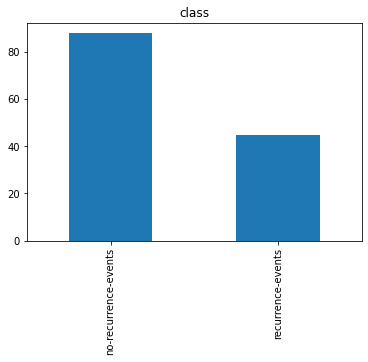

In [22]:
cancer_set_for_training70, cancer_testing70 = data_utils.data_split(cancer_dataset, 70)
cancer_training70, cancer_validation70 = data_utils.split_training_data_for_pruning(cancer_set_for_training70)
print(cancer_training70['CLASS'].value_counts())
cancer_training70['CLASS'].value_counts().plot(kind='bar', title='class')

<AxesSubplot:title={'center':'class'}>

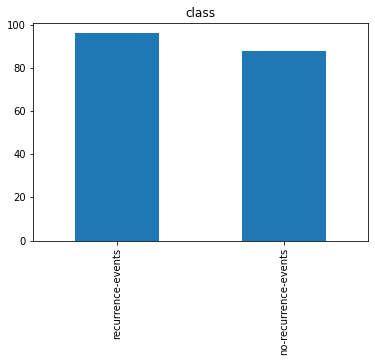

In [23]:
#Target for all 174
resampling_cancer70 = cancer_training70.copy()
recurrence_events_part70 = resampling_cancer70[resampling_cancer70['CLASS'] == 'recurrence-events']
no_recurrence_events_part70 = resampling_cancer70[resampling_cancer70['CLASS'] == 'no-recurrence-events'] 

recurrence_events_part_upsampled70 = resample(recurrence_events_part70, 
                                 replace=True,     
                                 n_samples=96)

# Combine majority class with upsamplet minority class
balanced_cnacer_training70 = pd.concat([recurrence_events_part_upsampled70, no_recurrence_events_part70])
balanced_cnacer_training70 = balanced_cnacer_training70.reset_index(level=None, drop=True, inplace=False, col_level=0, col_fill='')
balanced_cnacer_training70 = balanced_cnacer_training70.sample(frac=1).reset_index(drop=True)

cancer_training70 = balanced_cnacer_training70.copy()
cancer_training70['CLASS'].value_counts().plot(kind='bar', title='class')

### Cancer 80%

no-recurrence-events    103
recurrence-events        48
Name: CLASS, dtype: int64


<AxesSubplot:title={'center':'class'}>

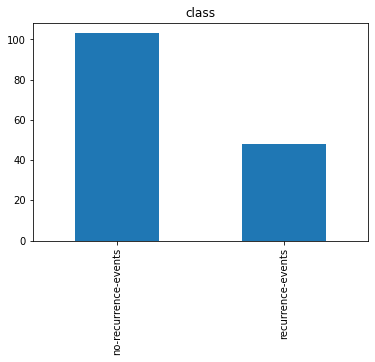

In [24]:
cancer_set_for_training80, cancer_testing80 = data_utils.data_split(cancer_dataset, 80)
cancer_training80, cancer_validation80 = data_utils.split_training_data_for_pruning(cancer_set_for_training80)
print(cancer_training80['CLASS'].value_counts())
cancer_training80['CLASS'].value_counts().plot(kind='bar', title='class')

<AxesSubplot:title={'center':'class'}>

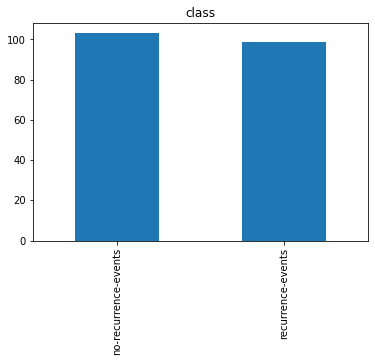

In [25]:
#Target for all 174
resampling_cancer80 = cancer_training80.copy()
recurrence_events_part80 = resampling_cancer80[resampling_cancer80['CLASS'] == 'recurrence-events']
no_recurrence_events_part80 = resampling_cancer80[resampling_cancer80['CLASS'] == 'no-recurrence-events'] 

recurrence_events_part_upsampled80 = resample(recurrence_events_part80, 
                                 replace=True,     
                                 n_samples=99)

# Combine majority class with upsamplet minority class
balanced_cnacer_training80 = pd.concat([recurrence_events_part_upsampled80, no_recurrence_events_part80])
balanced_cnacer_training80 = balanced_cnacer_training80.reset_index(level=None, drop=True, inplace=False, col_level=0, col_fill='')
balanced_cnacer_training80 = balanced_cnacer_training80.sample(frac=1).reset_index(drop=True)

cancer_training80 = balanced_cnacer_training80.copy()
cancer_training80['CLASS'].value_counts().plot(kind='bar', title='class')

### Cancer 90%

no-recurrence-events    116
recurrence-events        55
Name: CLASS, dtype: int64


<AxesSubplot:title={'center':'class'}>

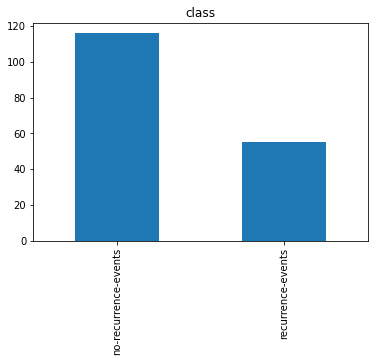

In [26]:
cancer_set_for_training90, cancer_testing90 = data_utils.data_split(cancer_dataset, 90)
cancer_training90, cancer_validation90 = data_utils.split_training_data_for_pruning(cancer_set_for_training90)
print(cancer_training90['CLASS'].value_counts())
cancer_training90['CLASS'].value_counts().plot(kind='bar', title='class')

<AxesSubplot:title={'center':'class'}>

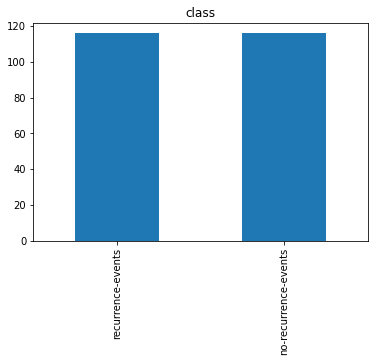

In [27]:

#Target for all 174
resampling_cancer90 = cancer_training90.copy()
recurrence_events_part90 = resampling_cancer90[resampling_cancer90['CLASS'] == 'recurrence-events']
no_recurrence_events_part90 = resampling_cancer90[resampling_cancer90['CLASS'] == 'no-recurrence-events'] 

recurrence_events_part_upsampled90 = resample(recurrence_events_part90, 
                                 replace=True,     
                                 n_samples=116)

# Combine majority class with upsamplet minority class
balanced_cnacer_training90 = pd.concat([recurrence_events_part_upsampled90, no_recurrence_events_part90])
balanced_cnacer_training90 = balanced_cnacer_training90.reset_index(level=None, drop=True, inplace=False, col_level=0, col_fill='')
balanced_cnacer_training90 = balanced_cnacer_training90.sample(frac=1).reset_index(drop=True)

cancer_training90 = balanced_cnacer_training90.copy()
cancer_training90['CLASS'].value_counts().plot(kind='bar', title='class')

## Model Training

In [28]:
train_tree_for_different_heuristics(cancer_training70, cancer_testing70, cancer_validation70)

Before Pruning - heuristic = gini_impurity_weighted
Accuracy for: testing 60.47% | training 99.46% | levels 10 | leafs 69
After Pruning:
Accuracy for: testing 70.93% | training 80.98% | levels 10 | leafs 29


Before Pruning - heuristic = info_gain
Accuracy for: testing 54.65% | training 99.46% | levels 12 | leafs 64
After Pruning:
Accuracy for: testing 60.47% | training 86.96% | levels 12 | leafs 38


Before Pruning - heuristic = information_gain_ratio
Accuracy for: testing 55.81% | training 99.46% | levels 16 | leafs 54
After Pruning:
Accuracy for: testing 70.93% | training 80.98% | levels 14 | leafs 29


Before Pruning - heuristic = distance_measure
Accuracy for: testing 47.67% | training 76.09% | levels 14 | leafs 57
After Pruning:
Accuracy for: testing 52.33% | training 55.98% | levels 12 | leafs 12


Before Pruning - heuristic = j_measure
Accuracy for: testing 56.98% | training 99.46% | levels 12 | leafs 63
After Pruning:
Accuracy for: testing 62.79% | training 86.96% | levels 12 

In [29]:
train_tree_for_different_heuristics(cancer_training80, cancer_testing80, cancer_validation80)

Before Pruning - heuristic = gini_impurity_weighted
Accuracy for: testing 56.90% | training 99.01% | levels 10 | leafs 67
After Pruning:
Accuracy for: testing 68.97% | training 73.27% | levels 4 | leafs 5


Before Pruning - heuristic = info_gain
Accuracy for: testing 53.45% | training 98.51% | levels 12 | leafs 70
After Pruning:
Accuracy for: testing 68.97% | training 72.77% | levels 4 | leafs 4


Before Pruning - heuristic = information_gain_ratio
Accuracy for: testing 50.00% | training 98.51% | levels 18 | leafs 69
After Pruning:
Accuracy for: testing 68.97% | training 73.27% | levels 6 | leafs 7


Before Pruning - heuristic = distance_measure
Accuracy for: testing 36.21% | training 80.69% | levels 16 | leafs 81
After Pruning:
Accuracy for: testing 58.62% | training 60.89% | levels 16 | leafs 24


Before Pruning - heuristic = j_measure
Accuracy for: testing 53.45% | training 98.51% | levels 12 | leafs 70
After Pruning:
Accuracy for: testing 68.97% | training 72.77% | levels 4 | leafs

In [30]:
train_tree_for_different_heuristics(cancer_training90, cancer_testing90, cancer_validation90)

Before Pruning - heuristic = gini_impurity_weighted
Accuracy for: testing 68.97% | training 98.28% | levels 12 | leafs 72
After Pruning:
Accuracy for: testing 75.86% | training 75.86% | levels 8 | leafs 17


Before Pruning - heuristic = info_gain
Accuracy for: testing 62.07% | training 98.71% | levels 12 | leafs 76
After Pruning:
Accuracy for: testing 72.41% | training 78.02% | levels 8 | leafs 20


Before Pruning - heuristic = information_gain_ratio
Accuracy for: testing 62.07% | training 99.14% | levels 16 | leafs 77
After Pruning:
Accuracy for: testing 62.07% | training 70.26% | levels 6 | leafs 7


Before Pruning - heuristic = distance_measure
Accuracy for: testing 44.83% | training 79.31% | levels 16 | leafs 86
After Pruning:
Accuracy for: testing 55.17% | training 67.24% | levels 14 | leafs 41


Before Pruning - heuristic = j_measure
Accuracy for: testing 62.07% | training 98.71% | levels 12 | leafs 75
After Pruning:
Accuracy for: testing 72.41% | training 78.02% | levels 8 | lea

# CMC Dataset

## Dataset preparation

In [31]:
cmc_dataset_path = 'data/cmc.data'
cmc_dataset_labels = ['age','education','husbandEducation','noChildren','religion','isWorking','husbandOccupation','livingStandard', 'mediaExposure', 'CLASS']
cmc_dataset = data_utils.preapare_dataset(cmc_dataset_path, cmc_dataset_labels)
# cmc_dataset['CLASS'] = cmc_dataset['CLASS'].apply(str)
cmc_dataset.head()

,age,education,husbandEducation,noChildren,religion,isWorking,husbandOccupation,livingStandard,mediaExposure,CLASS
0,25,3,4,0,1,1,1,3,0,1
1,25,3,3,1,1,1,3,2,0,1
2,28,2,3,1,1,1,3,1,0,1
3,28,4,4,1,0,1,1,3,0,1
4,23,3,4,1,1,1,2,3,0,3


In [32]:
vals_to_replace_education = {1: 'low', 2:'medium', 3:'normal', 4:'high'}
vals_to_replace_husbandEducation = {1: 'low', 2:'medium', 3:'normal', 4:'high'}
vals_to_replace_religion = {0: 'Non-Islam', 1:'Islam'}
vals_to_replace_isWorking = {0: 'Yes', 1:'No'}
vals_to_replace_livingStandard= {1: 'low', 2:'medium', 3:'normal', 4:'high'}
vals_to_replace_mediaExposure = {0: 'Good', 1:'Not good'}
vals_to_replace_CLASS = {1: 'No-use', 2:'Long-term', 3: 'Short-term'}
cmc_dataset['education'] = cmc_dataset['education'].map(vals_to_replace_education)
cmc_dataset['husbandEducation'] = cmc_dataset['husbandEducation'].map(vals_to_replace_husbandEducation)
cmc_dataset['religion'] = cmc_dataset['religion'].map(vals_to_replace_religion)
cmc_dataset['isWorking'] = cmc_dataset['isWorking'].map(vals_to_replace_isWorking)
cmc_dataset['livingStandard'] = cmc_dataset['livingStandard'].map(vals_to_replace_livingStandard)
cmc_dataset['mediaExposure'] = cmc_dataset['mediaExposure'].map(vals_to_replace_mediaExposure)
cmc_dataset['CLASS'] = cmc_dataset['CLASS'].map(vals_to_replace_CLASS)
cmc_dataset.head()

,age,education,husbandEducation,noChildren,religion,isWorking,husbandOccupation,livingStandard,mediaExposure,CLASS
0,25,normal,high,0,Islam,No,1,normal,Good,No-use
1,25,normal,normal,1,Islam,No,3,medium,Good,No-use
2,28,medium,normal,1,Islam,No,3,low,Good,No-use
3,28,high,high,1,Non-Islam,No,1,normal,Good,No-use
4,23,normal,high,1,Islam,No,2,normal,Good,Short-term


### Cmc 70%

No-use        296
Short-term    238
Long-term     153
Name: CLASS, dtype: int64


<AxesSubplot:title={'center':'class'}>

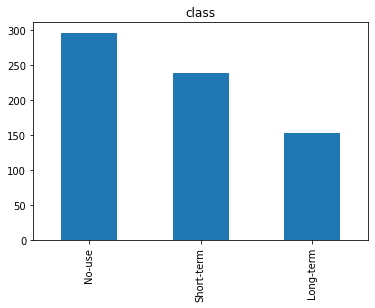

In [33]:
cmc_set_for_training70, cmc_testing70 = data_utils.data_split(cmc_dataset, 70)
cmc_training70, cmc_validation70 = data_utils.split_training_data_for_pruning(cmc_set_for_training70)
print(cmc_training70['CLASS'].value_counts())
#This data seems to be balanced so dont need aditional balancing
cmc_training70['CLASS'].value_counts().plot(kind='bar', title='class')

## Cmc 80%

No-use        339
Short-term    270
Long-term     176
Name: CLASS, dtype: int64


<AxesSubplot:title={'center':'class'}>

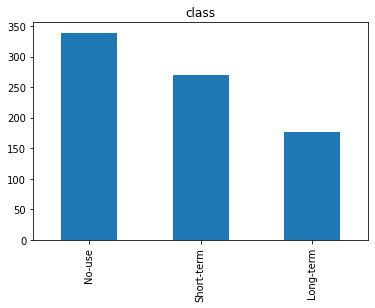

In [34]:
cmc_set_for_training80, cmc_testing80 = data_utils.data_split(cmc_dataset, 80)
cmc_training80, cmc_validation80 = data_utils.split_training_data_for_pruning(cmc_set_for_training80)
print(cmc_training80['CLASS'].value_counts())
#This data seems to be balanced so dont need aditional balancing
cmc_training80['CLASS'].value_counts().plot(kind='bar', title='class')

## Cmc 90%

No-use        381
Short-term    303
Long-term     199
Name: CLASS, dtype: int64


<AxesSubplot:title={'center':'class'}>

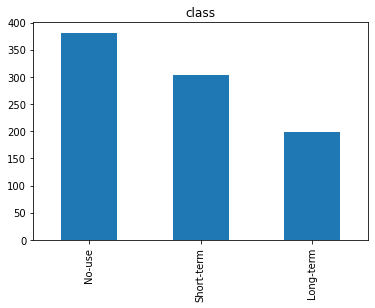

In [35]:
cmc_set_for_training90, cmc_testing90 = data_utils.data_split(cmc_dataset, 90)
cmc_training90, cmc_validation90 = data_utils.split_training_data_for_pruning(cmc_set_for_training90)
print(cmc_training90['CLASS'].value_counts())
#This data seems to be balanced so dont need aditional balancing
cmc_training90['CLASS'].value_counts().plot(kind='bar', title='class')

## Model Training

In [36]:
train_tree_for_different_heuristics(cmc_training70, cmc_testing70, cmc_validation70)

Before Pruning - heuristic = gini_impurity_weighted
Accuracy for: testing 49.10% | training 80.06% | levels 28 | leafs 174
After Pruning:
Accuracy for: testing 53.17% | training 58.22% | levels 12 | leafs 40


Before Pruning - heuristic = info_gain
Accuracy for: testing 43.89% | training 72.34% | levels 40 | leafs 216
After Pruning:
Accuracy for: testing 45.02% | training 45.41% | levels 24 | leafs 23


Before Pruning - heuristic = information_gain_ratio
Accuracy for: testing 44.80% | training 70.01% | levels 42 | leafs 208
After Pruning:
Accuracy for: testing 44.57% | training 45.85% | levels 26 | leafs 41


Before Pruning - heuristic = distance_measure
Accuracy for: testing 43.21% | training 55.60% | levels 28 | leafs 158
After Pruning:
Accuracy for: testing 44.12% | training 48.33% | levels 22 | leafs 62


Before Pruning - heuristic = j_measure
Accuracy for: testing 43.67% | training 72.34% | levels 40 | leafs 217
After Pruning:
Accuracy for: testing 45.02% | training 45.41% | level

In [37]:
train_tree_for_different_heuristics(cmc_training80, cmc_testing80, cmc_validation80)

Before Pruning - heuristic = gini_impurity_weighted
Accuracy for: testing 45.76% | training 78.34% | levels 26 | leafs 190
After Pruning:
Accuracy for: testing 49.83% | training 61.53% | levels 20 | leafs 68


Before Pruning - heuristic = info_gain
Accuracy for: testing 37.97% | training 68.28% | levels 40 | leafs 214
After Pruning:
Accuracy for: testing 44.41% | training 56.94% | levels 38 | leafs 120


Before Pruning - heuristic = information_gain_ratio
Accuracy for: testing 41.69% | training 68.92% | levels 42 | leafs 215
After Pruning:
Accuracy for: testing 43.05% | training 60.38% | levels 40 | leafs 146


Before Pruning - heuristic = distance_measure
Accuracy for: testing 38.31% | training 54.65% | levels 30 | leafs 157
After Pruning:
Accuracy for: testing 43.05% | training 49.55% | levels 20 | leafs 75


Before Pruning - heuristic = j_measure
Accuracy for: testing 37.97% | training 68.28% | levels 40 | leafs 214
After Pruning:
Accuracy for: testing 44.41% | training 56.94% | lev

In [38]:
train_tree_for_different_heuristics(cmc_training90, cmc_testing90, cmc_validation90)

Before Pruning - heuristic = gini_impurity_weighted
Accuracy for: testing 50.68% | training 77.01% | levels 34 | leafs 195
After Pruning:
Accuracy for: testing 43.92% | training 56.06% | levels 16 | leafs 34


Before Pruning - heuristic = info_gain
Accuracy for: testing 40.54% | training 67.61% | levels 42 | leafs 233
After Pruning:
Accuracy for: testing 41.22% | training 53.34% | levels 38 | leafs 112


Before Pruning - heuristic = information_gain_ratio
Accuracy for: testing 44.59% | training 66.02% | levels 42 | leafs 223
After Pruning:
Accuracy for: testing 43.24% | training 53.91% | levels 38 | leafs 121


Before Pruning - heuristic = distance_measure
Accuracy for: testing 35.14% | training 55.38% | levels 26 | leafs 174
After Pruning:
Accuracy for: testing 41.22% | training 49.49% | levels 26 | leafs 73


Before Pruning - heuristic = j_measure
Accuracy for: testing 40.54% | training 67.61% | levels 42 | leafs 234
After Pruning:
Accuracy for: testing 41.22% | training 53.57% | lev

# Adult Dataset

## Data preparation

In [39]:
adult_dataset_path = 'data/adult.data'
adult_dataset_labels = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hourse-per-week','native-country','CLASS']
adult_dataset = data_utils.preapare_dataset(adult_dataset_path, adult_dataset_labels)
adult_dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hourse-per-week,native-country,CLASS
0,24,Private,64167,Assoc-voc,11,Never-married,Tech-support,Unmarried,Black,Female,0,0,40,United-States,<=50K
1,35,Private,227571,7th-8th,4,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,Mexico,<=50K
2,35,Federal-gov,39207,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,38,Private,223433,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,59,Private,147989,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,?,<=50K


In [40]:
adult_dataset = adult_dataset[['age','workclass','education','education-num','marital-status','occupation','relationship','race','sex','hourse-per-week', 'native-country' ,'CLASS']]

for element in list(adult_dataset):
    if adult_dataset[element].dtype not in [np.float64, np.int64]:
        adult_dataset[element] = adult_dataset[element].str.strip()

adult_dataset['CLASS'] = adult_dataset['CLASS'].str.strip()
adult_dataset.head()
adult_dataset

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hourse-per-week,native-country,CLASS
0,24,Private,Assoc-voc,11,Never-married,Tech-support,Unmarried,Black,Female,40,United-States,<=50K
1,35,Private,7th-8th,4,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,40,Mexico,<=50K
2,35,Federal-gov,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
3,38,Private,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Male,40,United-States,<=50K
4,59,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,46,Private,Assoc-acdm,12,Never-married,Adm-clerical,Not-in-family,White,Female,47,Cuba,<=50K
32557,23,Private,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,25,United-States,<=50K
32558,30,State-gov,Assoc-voc,11,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,<=50K
32559,23,Private,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,40,United-States,<=50K


In [41]:
adult_dataset.dropna(how='any', axis=0)
indexNames = adult_dataset[(adult_dataset['workclass'] == '?') | (adult_dataset['education'] == '?') | (adult_dataset['marital-status'] == '?') | (adult_dataset['occupation'] == '?') | (adult_dataset['relationship'] == '?') | (adult_dataset['race'] == '?') | (adult_dataset['sex'] == '?') | (adult_dataset['native-country'] == '?') ].index
# print(indexNames)
adult_dataset.drop(indexNames, inplace=True)
adult_dataset.head()
adult_dataset.reset_index(inplace=False)
adult_dataset

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hourse-per-week,native-country,CLASS
0,24,Private,Assoc-voc,11,Never-married,Tech-support,Unmarried,Black,Female,40,United-States,<=50K
1,35,Private,7th-8th,4,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,40,Mexico,<=50K
2,35,Federal-gov,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
3,38,Private,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Male,40,United-States,<=50K
5,50,Private,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,46,Private,Assoc-acdm,12,Never-married,Adm-clerical,Not-in-family,White,Female,47,Cuba,<=50K
32557,23,Private,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,25,United-States,<=50K
32558,30,State-gov,Assoc-voc,11,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,<=50K
32559,23,Private,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,40,United-States,<=50K


### Adult 70%

<=50K    10574
>50K      3501
Name: CLASS, dtype: int64


<AxesSubplot:title={'center':'class'}>

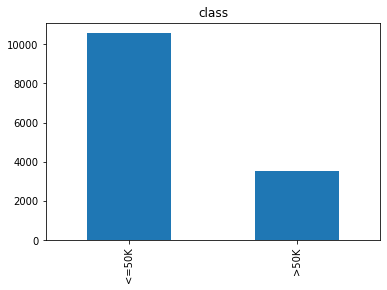

In [42]:
adult_set_for_training70, adult_testing70 = data_utils.data_split(adult_dataset, 70)
adult_training70, adult_validation70 = data_utils.split_training_data_for_pruning(adult_set_for_training70)

print(adult_training70['CLASS'].value_counts())
adult_training70['CLASS'].value_counts().plot(kind='bar', title='class')

<AxesSubplot:title={'center':'class'}>

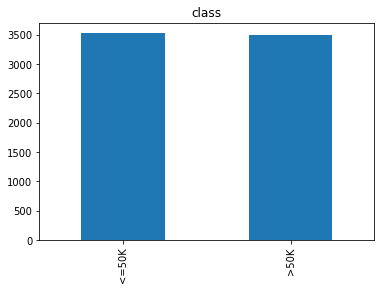

In [43]:
resampling_adult70 = adult_training70.copy()
less_50k_part70 = resampling_adult70[resampling_adult70['CLASS'] == '<=50K']
more_50k_part70 = resampling_adult70[resampling_adult70['CLASS'] == '>50K'] 

less_50k_part_downsampled70 = resample(less_50k_part70, 
                                 replace=False,    
                                 n_samples=3532)

# Combine minority class with downsampled majority class
balanced_adult_training70 = pd.concat([less_50k_part_downsampled70, more_50k_part70])
balanced_adult_training70 = balanced_adult_training70.reset_index(level=None, drop=True, inplace=False, col_level=0, col_fill='')
balanced_adult_training70 = balanced_adult_training70.sample(frac=1).reset_index(drop=True)

adult_training70 = balanced_adult_training70.copy()
adult_training70['CLASS'].value_counts().plot(kind='bar', title='class')

### Adult 80%

<=50K    12049
>50K      4036
Name: CLASS, dtype: int64


<AxesSubplot:title={'center':'class'}>

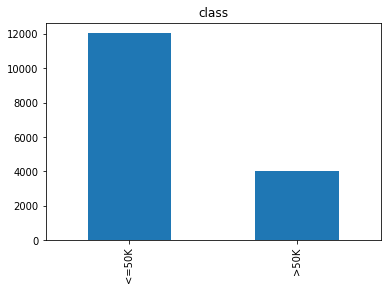

In [44]:
adult_set_for_training80, adult_testing80 = data_utils.data_split(adult_dataset, 80)
adult_training80, adult_validation80 = data_utils.split_training_data_for_pruning(adult_set_for_training80)

print(adult_training80['CLASS'].value_counts())
adult_training80['CLASS'].value_counts().plot(kind='bar', title='class')

<AxesSubplot:title={'center':'class'}>

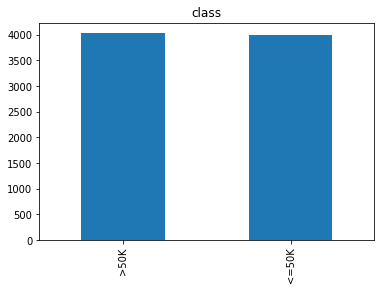

In [45]:
resampling_adult80 = adult_training80.copy()
less_50k_part80 = resampling_adult80[resampling_adult80['CLASS'] == '<=50K']
more_50k_part80 = resampling_adult80[resampling_adult80['CLASS'] == '>50K'] 

less_50k_part_downsampled80 = resample(less_50k_part80, 
                                 replace=False,    
                                 n_samples=4002)

# Combine minority class with downsampled majority class
balanced_adult_training80 = pd.concat([less_50k_part_downsampled80, more_50k_part80])
balanced_adult_training80 = balanced_adult_training80.reset_index(level=None, drop=True, inplace=False, col_level=0, col_fill='')
balanced_adult_training80 = balanced_adult_training80.sample(frac=1).reset_index(drop=True)

adult_training80 = balanced_adult_training80.copy()
adult_training80['CLASS'].value_counts().plot(kind='bar', title='class')

### Adult 90%

<=50K    13571
>50K      4525
Name: CLASS, dtype: int64


<AxesSubplot:title={'center':'class'}>

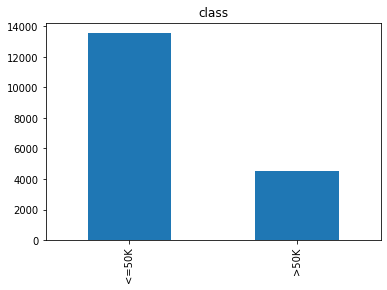

In [46]:
adult_set_for_training90, adult_testing90 = data_utils.data_split(adult_dataset, 90)
adult_training90, adult_validation90 = data_utils.split_training_data_for_pruning(adult_set_for_training90)

print(adult_training90['CLASS'].value_counts())
adult_training90['CLASS'].value_counts().plot(kind='bar', title='class')

<AxesSubplot:title={'center':'class'}>

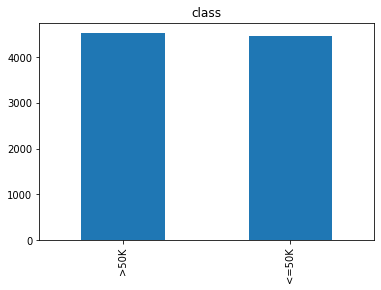

In [47]:
resampling_adult90 = adult_training90.copy()
less_50k_part90 = resampling_adult90[resampling_adult90['CLASS'] == '<=50K']
more_50k_part90 = resampling_adult90[resampling_adult90['CLASS'] == '>50K'] 

less_50k_part_downsampled90 = resample(less_50k_part90, 
                                 replace=False,    
                                 n_samples=4469)

# Combine minority class with downsampled majority class
balanced_adult_training90 = pd.concat([less_50k_part_downsampled90, more_50k_part90])
balanced_adult_training90 = balanced_adult_training90.reset_index(level=None, drop=True, inplace=False, col_level=0, col_fill='')
balanced_adult_training90 = balanced_adult_training90.sample(frac=1).reset_index(drop=True)

adult_training90 = balanced_adult_training90.copy()
adult_training90['CLASS'].value_counts().plot(kind='bar', title='class')

## Model Training

In [48]:
train_tree_for_different_heuristics(adult_training70, adult_testing70, adult_validation70)

Before Pruning - heuristic = gini_impurity_weighted
Accuracy for: testing 77.59% | training 81.91% | levels 22 | leafs 436
After Pruning:
Accuracy for: testing 79.71% | training 80.83% | levels 22 | leafs 198


Before Pruning - heuristic = info_gain
Accuracy for: testing 64.89% | training 71.58% | levels 108 | leafs 279
After Pruning:
Accuracy for: testing 75.12% | training 50.22% | levels 2 | leafs 2


Before Pruning - heuristic = information_gain_ratio
Accuracy for: testing 65.13% | training 70.91% | levels 108 | leafs 271
After Pruning:
Accuracy for: testing 75.12% | training 50.22% | levels 2 | leafs 2


Before Pruning - heuristic = distance_measure
Accuracy for: testing 67.45% | training 71.69% | levels 16 | leafs 369
After Pruning:
Accuracy for: testing 74.13% | training 59.15% | levels 16 | leafs 126


Before Pruning - heuristic = j_measure
Accuracy for: testing 64.89% | training 71.58% | levels 108 | leafs 279
After Pruning:
Accuracy for: testing 75.12% | training 50.22% | leve

In [49]:
train_tree_for_different_heuristics(adult_training80, adult_testing80, adult_validation80)

Before Pruning - heuristic = gini_impurity_weighted
Accuracy for: testing 77.95% | training 81.35% | levels 26 | leafs 507
After Pruning:
Accuracy for: testing 79.53% | training 80.22% | levels 20 | leafs 201


Before Pruning - heuristic = info_gain
Accuracy for: testing 65.56% | training 71.32% | levels 98 | leafs 303
After Pruning:
Accuracy for: testing 73.11% | training 50.85% | levels 34 | leafs 26


Before Pruning - heuristic = information_gain_ratio
Accuracy for: testing 64.98% | training 70.40% | levels 98 | leafs 292
After Pruning:
Accuracy for: testing 73.11% | training 50.85% | levels 34 | leafs 26


Before Pruning - heuristic = distance_measure
Accuracy for: testing 70.18% | training 68.06% | levels 16 | leafs 227
After Pruning:
Accuracy for: testing 73.18% | training 58.81% | levels 14 | leafs 117


Before Pruning - heuristic = j_measure
Accuracy for: testing 65.56% | training 71.32% | levels 98 | leafs 303
After Pruning:
Accuracy for: testing 73.11% | training 50.85% | lev

In [50]:
train_tree_for_different_heuristics(adult_training90, adult_testing90, adult_validation90)

Before Pruning - heuristic = gini_impurity_weighted
Accuracy for: testing 78.32% | training 81.33% | levels 26 | leafs 573
After Pruning:
Accuracy for: testing 81.34% | training 79.49% | levels 18 | leafs 220


Before Pruning - heuristic = info_gain
Accuracy for: testing 65.83% | training 71.03% | levels 104 | leafs 305
After Pruning:
Accuracy for: testing 73.19% | training 51.05% | levels 28 | leafs 26


Before Pruning - heuristic = information_gain_ratio
Accuracy for: testing 65.89% | training 70.80% | levels 104 | leafs 294
After Pruning:
Accuracy for: testing 73.19% | training 51.05% | levels 28 | leafs 26


Before Pruning - heuristic = distance_measure
Accuracy for: testing 71.63% | training 67.79% | levels 14 | leafs 225
After Pruning:
Accuracy for: testing 73.12% | training 67.12% | levels 14 | leafs 126


Before Pruning - heuristic = j_measure
Accuracy for: testing 65.83% | training 71.03% | levels 104 | leafs 305
After Pruning:
Accuracy for: testing 73.19% | training 51.05% | 